## Task 1: A customer has a budget of 350,000 PLN and wants an EV with a minimum range

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("FEV.xlsx")
filtered_df= df[(df['Price_PLN']<=350000) & (df['Range']>= 400)]

avg_battery= filtered_df.groupby('Make')['Battery_capacity'].mean()

print("EVs matching customer budget and range:\n")
print(filtered_df[['Make', 'Model', 'Price_PLN', 'Range']])

print("\nAverage Battery Capacity by Make:\n")
display(avg_battery)

EVs matching customer budget and range:

             Make                        Model  Price_PLN  Range
0            Audi            e-tron 55 quattro     345700    438
8             BMW                          iX3     282900    460
15        Hyundai          Kona electric 64kWh     178400    449
18            Kia                 e-Niro 64kWh     167990    455
20            Kia                 e-Soul 64kWh     160990    452
22  Mercedes-Benz                          EQC     334700    414
39          Tesla  Model 3 Standard Range Plus     195490    430
40          Tesla           Model 3 Long Range     235490    580
41          Tesla          Model 3 Performance     260490    567
47     Volkswagen         ID.3 Pro Performance     155890    425
48     Volkswagen                   ID.3 Pro S     179990    549
49     Volkswagen                     ID.4 1st     202390    500

Average Battery Capacity by Make:



Make
Audi             95.000000
BMW              80.000000
Hyundai          64.000000
Kia              64.000000
Mercedes-Benz    80.000000
Tesla            68.000000
Volkswagen       70.666667
Name: Battery_capacity, dtype: float64

## Task 2: You suspect some EVs have unusually high or low energy consumption. Find the outliers in the mean - Energy consumption [kWh/100 km] column.(16 Marks)

In [3]:
df_cleaned = df.dropna(subset=['mean_Energy_consumption'])
Q1= df_cleaned['mean_Energy_consumption'].quantile(0.25)
Q3= df_cleaned['mean_Energy_consumption'].quantile(0.75)
IQR= Q3-Q1

l_bound= Q1 - 0.5*IQR
u_bound= Q3 + 0.5*IQR

outliers= df_cleaned[(df_cleaned['mean_Energy_consumption']<l_bound) | (df_cleaned['mean_Energy_consumption']>u_bound)]

print("Outliers based on Energy Consumption:\n")
print(f"Lower Bound: {l_bound}")
print(f"Upper Bound: {u_bound}")
print(outliers[['Make','Model','mean_Energy_consumption']])

Outliers based on Energy Consumption:

Lower Bound: 11.649999999999999
Upper Bound: 27.45
             Make             Model  mean_Energy_consumption
2            Audi  e-tron S quattro                    27.55
51  Mercedes-Benz        EQV (long)                    28.20


## Task 3: Your manager wants to know if there's a strong relationship between battery capacity and range.

In [4]:
correlation = df['Battery_capacity'].corr(df['Range'])
print(f"Relation between Battery capacity & Range: {correlation:.2f}") 

Relation between Battery capacity & Range: 0.81


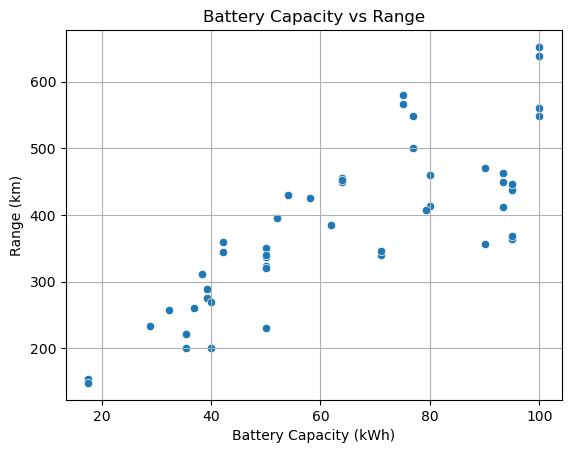

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=df, x='Battery_capacity', y='Range')

plt.title('Battery Capacity vs Range')

plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (km)')

plt.grid(True)
plt.show()

## Insights - 
>Since, the correlation is 0.81 we can say that there is a strong relationship between Battery_capacity and Range.

>All the scatters are going forward in an upward direction indicating more the Battery capacity more the Range.

## Task 4: Build an EV recommendation class. The class should allow users to input their budget, desired range, and battery capacity. The class should then return the top three EVs matching their criteria.

In [7]:
class EV_Recommendation:
    
    def __init__(self, dataframe):
        self.df = dataframe.dropna(subset=['Price_PLN', 'Range', 'Battery_capacity'])
    
    def recommend(self, Budget, Range, Battery):
        filtered = self.df[
            (self.df['Price_PLN'] <= Budget) &
            (self.df['Range'] >= Range) &
            (self.df['Battery_capacity'] >= Battery)
        ]
        
        top_ev = filtered.sort_values(by='Range', ascending=False).head(3)

        return top_ev[['Make', 'Model', 'Price_PLN', 'Range', 'Battery_capacity']]

In [9]:
recommendation = EV_Recommendation(df)

Budget = int(input("Enter Budget: "))
Range = int(input("Enter min range (in km): "))
Battery = int(input("Enter min battery capacity (in kWh): "))

recommended_evs = recommendation.recommend(Budget, Range, Battery)

print("\nTop 3 EVs based on your preferences:\n")
print(recommended_evs)


Enter Budget:  500000
Enter min range (in km):  200
Enter min battery capacity (in kWh):  50



Top 3 EVs based on your preferences:

     Make                    Model  Price_PLN  Range  Battery_capacity
42  Tesla  Model S Long Range Plus     368990    652             100.0
43  Tesla      Model S Performance     443990    639             100.0
40  Tesla       Model 3 Long Range     235490    580              75.0


## Task 5: Inferential Statistics – Hypothesis Testing: Test whether there is a significant difference in the average Engine power [KM] of vehicles manufactured by two leading manufacturers i.e. Tesla and Audi. What insights can you draw from the test results? Recommendations and Conclusion: Provide actionable insights based on your analysis. (Conduct a two sample t-test using ttest_ind from scipy.stats module)

In [10]:
from scipy.stats import ttest_ind

In [11]:
tesla_p=df[df['Make'] == 'Tesla']['Power']
audi_p=df[df['Make'] == 'Audi']['Power']

tesla_p= tesla_p.dropna()
audi_p= audi_p.dropna()

In [12]:
t_stat, p_value = ttest_ind(tesla_p, audi_p)

print('T_Stats:',t_stat)
print('P_value:',p_value)

T_Stats: 1.7024444538261416
P_value: 0.11672692675082785


In [13]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant diff in avg engine power between Tesla and Audi.")
else:
    print("Fail to reject the null hypothesis: No significant diff in avg engine power between Tesla and Audi.")

Fail to reject the null hypothesis: No significant diff in avg engine power between Tesla and Audi.


# Insights:

## No statistically significant difference was found in the average engine power between Tesla and Audi vehicles.

## The mean values of engine power differ, but the difference is not strong enough (statistically) to confidently say that one brand has more powerful engines than the other. 

## The t-statistic = 1.70 suggests a difference, but the p-value = 0.1167 tells us that the difference could easily be due to random chance.

# Recommendations: 

## Engine power cannot be the only deciding factor between Tesla and Audi if we're comparing their performance.(Consider other features like efficiency, acceleration, range & etc)
